# Hochschule Bonn-Rhein-Sieg

# Neural Networks, WS17/18

# Assignment 01 (09-October-2017)

In [1]:
import sympy as sp
import numpy as np
sp.init_printing(use_latex=True)
from IPython.display import Image

---
### Question 2: Read chapter 1 from Haykin’s book; summarize or sketch your insights in mind-map or an outline or a summary.

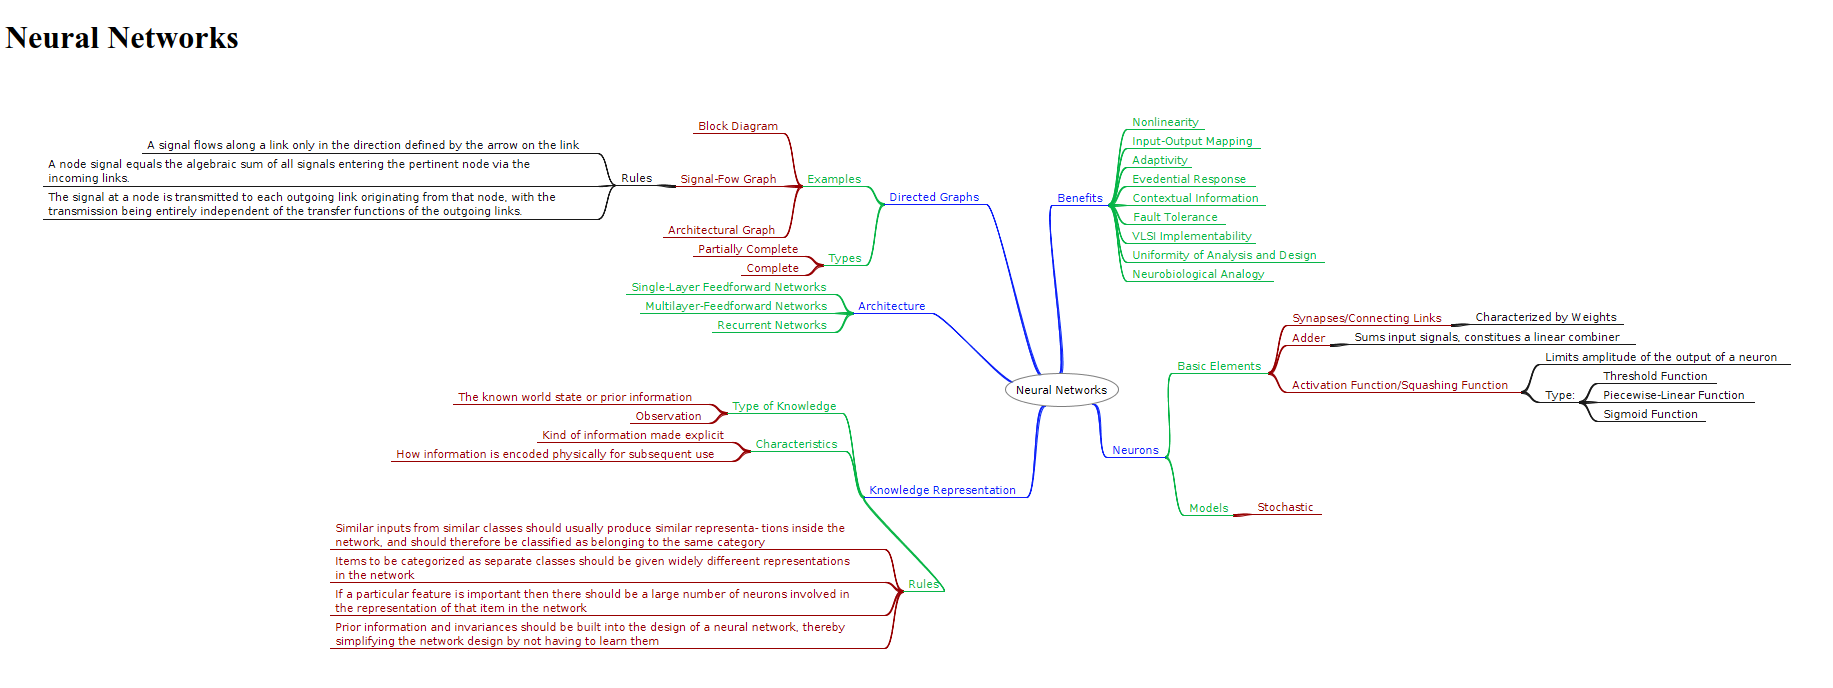

In [2]:
Image("Images/MindMap.png")

_**Note**_:

Please click [here](HTMLCode/HaykinChapter1_mindmap.html) (navigation possible from Jupyter Notebok) to view the mind map in higher resolution as a clickable html file.

---
### Question 4: From Haykin’s book, Chapter 1 problems – “Models of a neuron”, solve any 2 out of 11 (1.1 to 1.11).  use sympy packege to solve them.

### 1.1 
An example of a logistic function is defined by 
$$\varphi(v)=\frac{1}{1+e^{(-av)}}$$
whose limiting values are 0 and 1. Show that the derivative of $\varphi(v)$ with respect to $v$ is given by
$$\frac{d\varphi}{dv}=a\varphi(v)[1-\varphi(v)]$$
What is the value of this derivative at the origin?

derivative of logistic function is: 


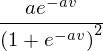

In [3]:
a,v = sp.symbols('a,v')
phi = 1/(1+sp.exp(-a*v))
phi_prime=sp.diff(phi,v)
print "derivative of logistic function is: "
phi_prime

So, we see that the derivative of the function is: 
\begin{align*}
\frac{d\varphi}{dv}&=\frac{a e^{- a v}}{\left(1 + e^{- a v}\right)^{2}}\\
&=a\cdot\frac{1}{1+e^{-av}}\cdot\frac{e^{- a v}}{\left(1 + e^{- a v}\right)}\\
&=a\varphi(v)[\frac{1+e^{- a v}-1}{\left(1 + e^{- a v}\right)}]\\
&=a\varphi(v)[1-\varphi(v)]
\end{align*}

At origin, $\varphi(0)=\frac{1}{2}$

So, $\frac{d\varphi}{dv}\Bigr|_{v=0}=\frac{a}{4}$


In [4]:
print "Value of derivative of logistic function at v=0, is:"
phi_prime.subs(v,0)

Value of derivative of logistic function at v=0, is:


---
### 1.3
Yet another sigmoid function is the algebraic sigmoid:
$$\varphi(v)=\frac{v}{\sqrt{1+v^2}}$$
whose limiting values are -1 and +1. Show that derivative of $\varphi(v)$ with respect to $v$ is 
$$\frac{d\varphi}{dv}=\frac{\varphi^3(v)}{v^3}$$
What is the value of this derivative at the origin?

derivative of algebraic sigmoid function is: 


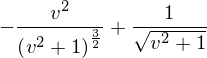

In [5]:
v = sp.symbols('v')
phi = v/sp.sqrt(1+v**2)
print "derivative of algebraic sigmoid function is: "
phi_prime=sp.diff(phi,v)
phi_prime

So, we see that the derivative of the function is:
\begin{align*}
\frac{d\varphi}{dv}&= \frac{1}{\sqrt{v^{2} + 1}}-\frac{v^{2}}{\left(v^{2} + 1\right)^{\frac{3}{2}}}\\
&=\frac{v}{\sqrt{v^{2} + 1}}\cdot\frac{1}{v}-\frac{v}{\sqrt{\left(v^{2} + 1\right)}}\cdot\frac{v}{\left(v^{2} + 1\right)}\\
&=\varphi\cdot[\frac{1}{v}-\frac{v}{1+v^2}]\\
&=\varphi\cdot[\frac{1+v^2-v^2}{v(1+v^2)}]\\
&=\frac{\varphi}{v}\cdot\frac{v^2}{1+v^2}\cdot\frac{1}{v^2}\\
&=\frac{\varphi}{v^3}\cdot\varphi^2\\
&=\frac{\varphi^3(v)}{v^3}
\end{align*}

At $v=0$,

So,  $\frac{d\varphi}{dv}\Bigr|_{v=0}=1$

In [6]:
print "Value of derivative of algebraic sigmoid at v=0, is:"
phi_prime.subs(v,0)

Value of derivative of algebraic sigmoid at v=0, is:


---
### Question 5: From Haykin’s book, Chapter 1 problems – “Network architectures”, solve any 2 out of 7 (1.12 to 1.19) including 1.13. 

#### 1.12
    A fully connected feedforward network has 10 source nodes. 2 hidden layers, one with 4 neurons and other with 3 neurons, and a single output neuron. Construct an architectural graph of this network

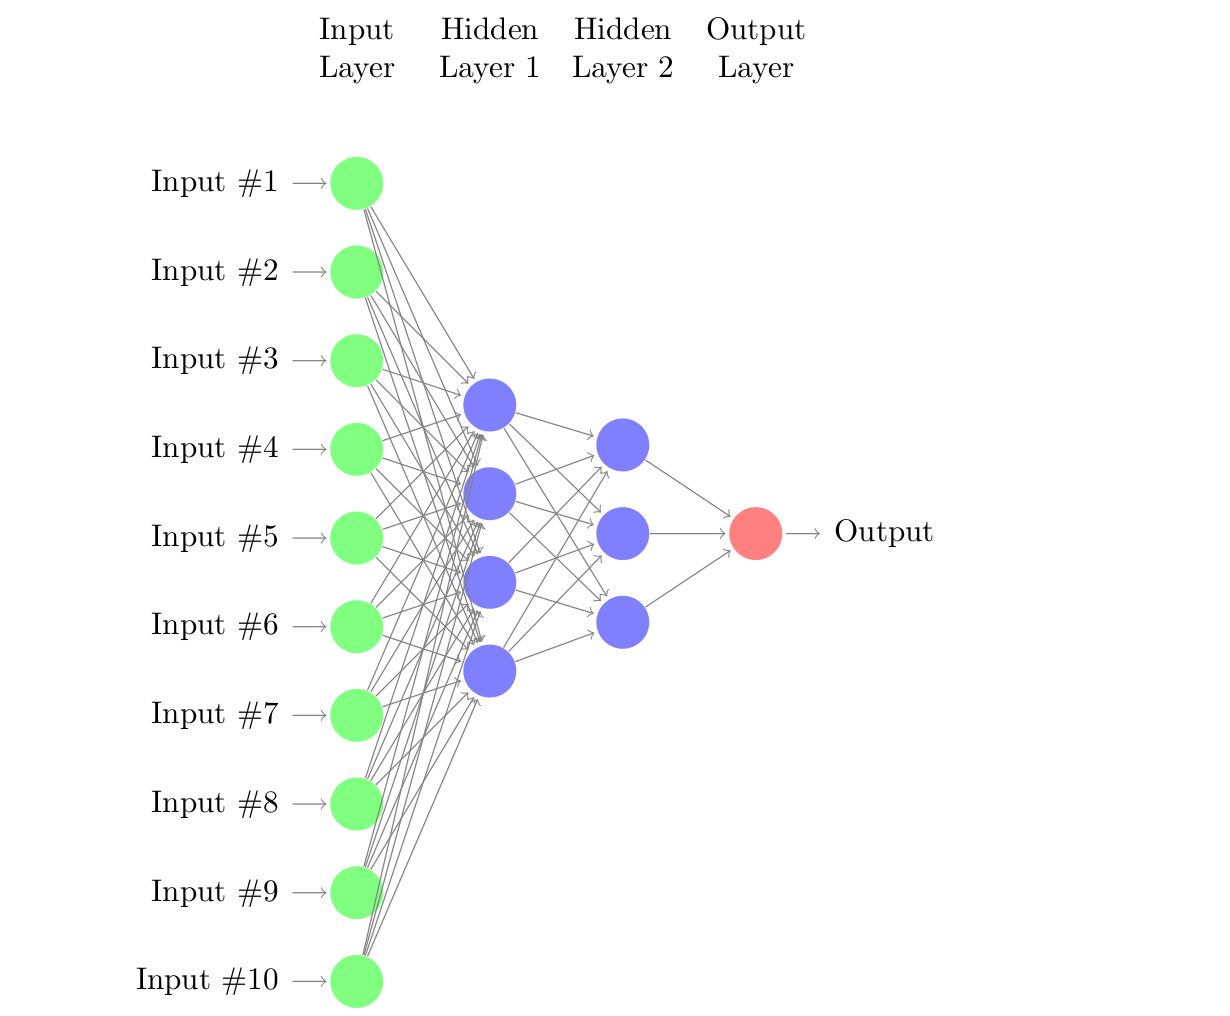

In [7]:
Image("Images/Network.png")

---
#### 1.13
#### (a) 
Figure P1.13 shows the signal-flow graph of a 2-2-2-1 feedforward network. The function $\varphi(\cdot)$ denotes a logistic function. Write the input/output mapping defined by this network.

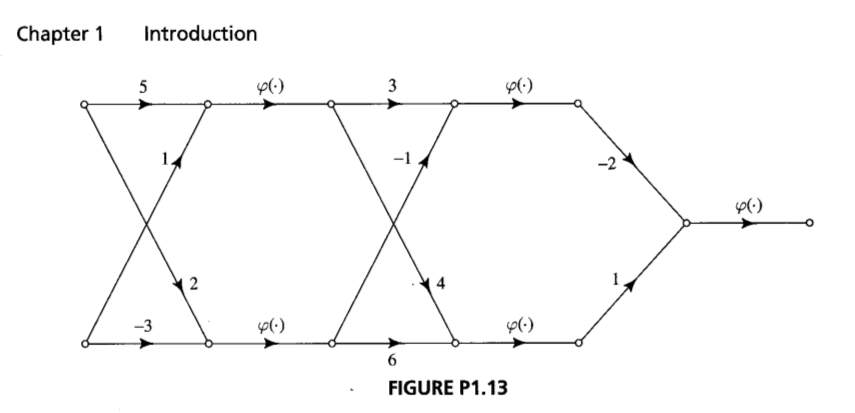

In [8]:
Image("Images/ScreenshotP113.png") #screenshot from Haykin’s book, Chapter 1b

In [9]:
#defining inputs (x1,x2) and logistic function (phi)
x1,x2,a,v=sp.symbols('x1,x2,a,v')
phi = 1/(1+sp.exp(-a*v)) #Using logistic function from 1.1

#defining hidden layers
hidden_layer_11 = phi.subs(v,5*x1+x2)
hidden_layer_12 = phi.subs(v,2*x1-3*x2)
hidden_layer_21 = phi.subs(v,3*hidden_layer_11-hidden_layer_12)
hidden_layer_22 = phi.subs(v,4*hidden_layer_11+6*hidden_layer_12)

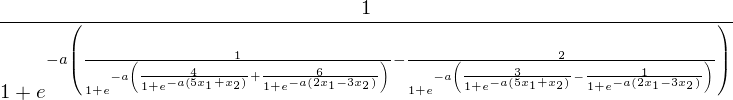

In [10]:
output_layer=phi.subs(v,-2*hidden_layer_21+hidden_layer_22)
output_layer

#### (b)
Suppose the output neuron in the signal-flow graph for Figure P1.13 operates in the linear region. Write the linear input-output mapping defined by this new  network.

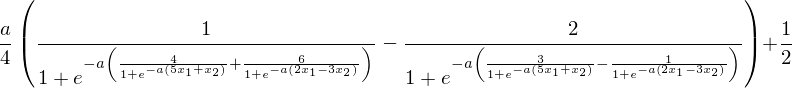

In [11]:
#Slope of the logistic function is
phi_prime=sp.diff(phi,v)

phi_prime_0=phi_prime.subs(v,0) #slope at origin ---slope

phi_0=phi.subs(v,0) #function value at 0 ---intercept

#For a linear signal, output=slope*x+intercept
#So, using this for the output layer

output_layer=phi_prime_0*(-2*hidden_layer_21+hidden_layer_22)+phi_0
output_layer

---
### Question 6: Solve 1.20 or 1.21 in section “Knowledge representation” 